## Amazon UK Products Dataset 2023 (2.2M Products)

Source: Kaggle.com (https://www.kaggle.com/datasets/asaniczka/amazon-uk-products-dataset-2023)

### Visualization 

Amazon UK is a retail giant renowned for its vast selection of products and extensive retail capacity. With an expansive online marketplace, it offers everything from electronics and fashion to home goods and groceries. Shoppers benefit from quick delivery options, including Prime, ensuring a seamless buying experience. 

This dataset contains details of sales for 2.2 million products, with ten columns from Product ID to Product Category. The first part of the analysis is reserved to understand any patterns of sales with visualaization such as,

1) Trending product categories and their sales performance

2) Analyze customer ratings to find top-rated products

3) Best price for any given product based on sales data and competition

The first step is importing relevant libraries such as numpy, pandas, matplotlib and seaborn (for interactive visualization)

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset=pd.read_csv("amz_uk.csv")

datasetn=dataset.dropna()

### Trending Catergories 

Here, we try to understand trending categories base on last month's sales. This is done by grouping products by category name with 'groupby()' and 'sum()' , and sorting based on the purchases in the previous month with sort_values() functions. 

The top 15 trending based categories are as follows

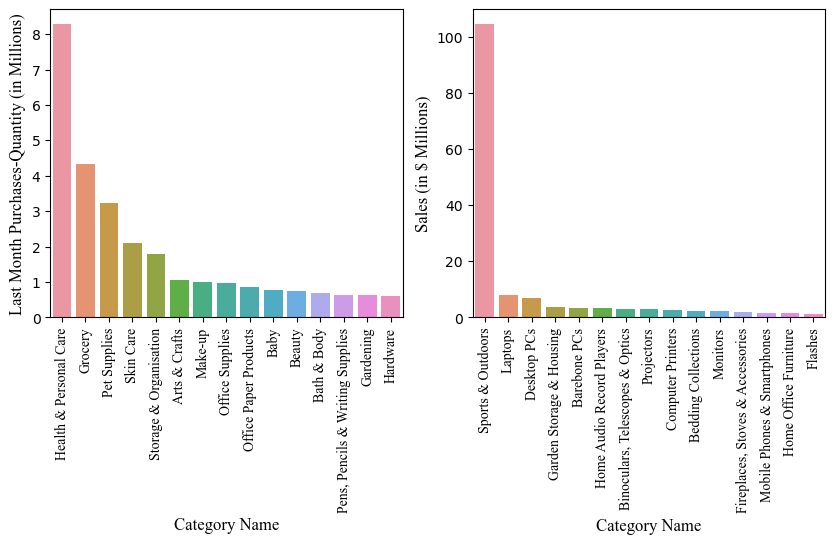

In [79]:
# Based on the Quantity sold in the last month
quantity=datasetn.groupby(['categoryName']).sum().sort_values(by=['boughtInLastMonth'], ascending=False).head(15)
quantity=quantity.reset_index() # This is to ensure that 'group by' column header aligns with the others

# Based on the total sales
sales=datasetn.groupby(['categoryName']).sum().sort_values(by=['price'], ascending=False).head(15)
sales=sales.reset_index()

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)

sns.barplot(x=quantity['categoryName'],y=quantity['boughtInLastMonth']/1000000)   # divided by million
plt.xlabel("Category Name", fontsize=12, fontfamily="Times New Roman")
plt.ylabel("Last Month Purchases-Quantity (in Millions)", fontsize=12, fontfamily="Times New Roman")
#plt.title("Top Trending Categories", fontsize=20, fontfamily="Times New Roman")
plt.xticks(rotation=90, fontsize=10, fontfamily="Times New Roman")


plt.subplot(1,2,2)
sns.barplot(x=sales['categoryName'],y=sales['price']/1000000) # divided by million
plt.xlabel('Category Name',fontsize=12, fontfamily='Times New Roman')
plt.ylabel('Sales (in $ Millions)',fontsize=12,fontfamily='Times New Roman')
plt.xticks(rotation=90, fontsize=10, fontfamily='Times New Roman')




plt.show()

### Top rated Products

These are the best 15 products based purchases, customer ratings and reviews.

In [48]:
df_ratings=datasetn.sort_values(by=['boughtInLastMonth','stars','reviews'],ascending=False)
df_ratings[['title','price','boughtInLastMonth','stars','reviews']].head(15)

,title,price,boughtInLastMonth,stars,reviews
205639,Catsan Hygiene Cat Litter 20L,14.99,50000,4.7,31204
1557617,Andrex Gentle Clean Toilet Rolls - 45 Toilet R...,22.22,50000,4.6,44511
1252283,Amazon Brand – Mama Bear Sensitive Unscented B...,12.60,40000,4.7,32294
1557618,"Regina Blitz Household Towel, 560 Super-Sized ...",14.99,30000,4.8,40648
995347,Maybelline New York Lash Sensational Sky High ...,8.75,30000,4.4,52463
1252285,"WaterWipes Original Plastic Free Baby Wipes, 7...",24.00,20000,4.8,19500
1557623,"OATLY Oat Drink Barista Edition, 6 x 1L",12.60,20000,4.8,6851
1557622,"Andrex Classic Clean Washlets ,Flushable Toile...",15.00,20000,4.8,3020
205640,"Earth Rated Dog Poo Bags, New Look, Guaranteed...",13.74,20000,4.7,129459
1252287,"Sudafed Blocked Nose Spray, Relief from Conges...",4.00,20000,4.7,14689
